# Lesson 1a: Perceptron Learning

In this lesson you will implement one of the first algorithms from the history of neural networks: the perceptron.

You will NOT be using Keras/Tensorflow or other machine learning toolkits for this problem. Instead, you will implement the perceptron learning rule yourself.

Read over the code below. Much has already been done. Areas where you need to add your own code are marked with "TODO" comments.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
# Import the 'iris' dataset.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])

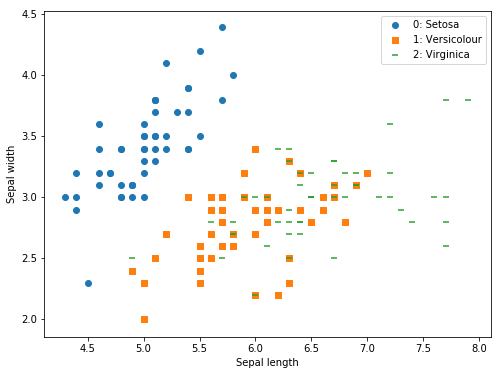

In [3]:
# Plot the data points.
def make_plot():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(X[:, 0][y==cat], X[:, 1][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

## Build a perceptron to distinguish Setosa from the other two varieties

Versicolour and Virginica are intermixed in this plot; note that some datapoints have identical (length, width) values but differente categories! Thus, we will focus on distinguishing Setosa from the other two, because perceptrons require data to be linearlly separable.

The perceptron will have a simple structure:
    
    * Two input nodes: one for Sepal length, one for Sepal width.
    * One output node: the output will be 0 for Setosa (category 0), and 1 for either of the other two categories.

In [42]:
class Perceptron():
    """Simple perceptron with 2 inputs and 1 output."""
    
    def __init__(self):
        # Initialize the perceptron weights and the bias term.
        self._w = [0, 0]
        self._b = 0
    
    def predict(self, x, verbose=False):
        """x is the input weight vector. Output is the result of running the perceptron on this input.
        
        Implement the Perceptron rule that involves multiplying weights by input, adding in bias, using a threshold, etc.
        
        The returned output should be 1 or 0.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        activation = self._b
        for i in range(len(x)):
            activation += x[i] * self._w[i]
        
        if verbose:
            print("Activation %f" % activation)
        
        return 1 if activation >= 0.5 else 0
        
    def accuracy(self, x, y):
        """Compute the total % accuracy over a set of inputs x and corresponding outputs y."""
        correct = 0
        for i in range(len(x)):
            example_x = x[i]
            example_y = y[i]
            if self.predict(example_x) == example_y:
                correct += 1
        return float(correct) / len(x)
            
    def train(self, x, y, num_iterations, verbose=False):
        """Train the perceptron for the given number of iterations on the input data x with 
        corresponding target values y.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        assert(len(x) == len(y))
        for i in range(num_iterations):
            print('Iter #%d' % i)
            for j in range(len(x)):
                instance_x = x[j]
                true_y = y[j]
                
                pred_y = self.predict(instance_x)
                error = (true_y - pred_y)
                self._b = self._b + error
                
                for i in range(len(self._w)):
                    self._w[i] = self._w[i] + (error * instance_x[i])

                    
                if verbose:
                    print("Error %.2f, Weights: [%.2f, %.2f]" % (error, self._w[0], self._[1]))
                    
            print('Weights: %.2f, %.2f' % (self._w[0], self._w[1]))
            print('Bias: %.2f' % self._b)  
            acc = self.accuracy(x, y)
            print('Accuracy: %.3f%%' % (acc * 100))
            print()

## Set up dataset for training a Setosa/not-Setosa classifier

In [30]:
def get_shuffled_data(x, y):
    """Convenient function to shuffle data and outputs, to inject some randomness into training."""
    # Create shuffle pattern of indices.
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    
    # Apply suffle pattern to x and y.
    x_shuffled = x[s]
    y_shuffled = y[s]
    return x_shuffled, y_shuffled

In [31]:
# Map data labels to just two categories.
y_two_categories = np.array([0 if i==0 else 1 for i in y])

In [38]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

## Train a perceptron on the shuffled data
Try to get as high an accuracy as possible.

In [55]:
p = Perceptron()
p.train(X_shuffled, y_shuffled, 3)

Iter #0
Weights: 6.10, -9.40
Bias: -2.00
Accuracy: 99.333%

Iter #1
Weights: 9.30, -15.10
Bias: -3.00
Accuracy: 99.333%

Iter #2
Weights: 13.80, -20.60
Bias: -4.00
Accuracy: 98.000%



## Plot the learned perceptron decision boundary

Our perceptron makes decisions based on the value of b + w1x1 + w2x2. We can set this to 0 and solve to find the decision boundary. 

Complete the function below to compute x2 (the y axis in the plot above) as a function of b, w1, x1, w2 for a given perceptron:  
x2 = (-b - w1x1) / w2

In [68]:
def get_y_decision_boundary(x1, per):
    x2 = (-per._b - (per._w[0] * x1))/per._w[1]
    return x2

### Compute the decision boundary for the perceptron trained above, and plot it.

In [70]:
y1 = get_y_decision_boundary(x_min, p)
y2 = get_y_decision_boundary(x_max, p)
y1, y2

(2.6864077669902913, 5.098058252427185)

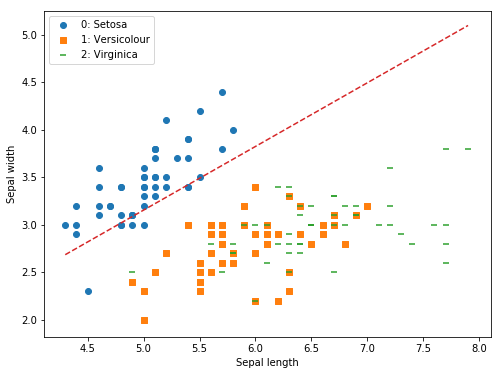

In [71]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Another model: Virginica/not-Virginica classifier

Build a new model, but grouping categories 0 and 1 together, trying to separate out Virginica from the other two classes.

In [61]:
y_two_categories_2 = np.array([0 if i==2 else 1 for i in y])

In [65]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories_2)
p2 = Perceptron()
p2.train(X_shuffled, y_shuffled, 4)

Iter #0
Weights: -8.30, 16.10
Bias: 5.00
Accuracy: 70.000%

Iter #1
Weights: -10.50, 25.10
Bias: 10.00
Accuracy: 67.333%

Iter #2
Weights: -11.50, 29.20
Bias: 13.00
Accuracy: 67.333%

Iter #3
Weights: -12.90, 29.40
Bias: 16.00
Accuracy: 68.000%



# Calculate the decision boundary and plot it.

In [72]:
y1 = get_y_decision_boundary(x_min, p2)
y2 = get_y_decision_boundary(x_max, p2)

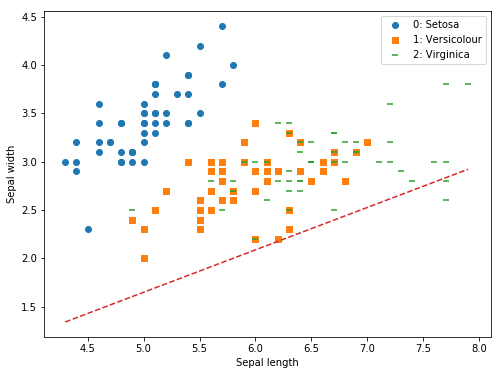

In [73]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

# Discuss the results in the cell below. How did the two perceptrons compare? 

The first perceptor did extremely well because the representation of the data matched the bias of its activation function. Its possible to separate almost with a clean line setosa from versicolour and virginica. On the other side, the linear function activation didn't worked so well between versicolour and virginica because the data is not explainable via the current representation.